In [1]:
var openDigger = require('../src/open_digger');
var year = 2022, startMonth = 1, endMonth = 12;
var baseOptions = {
    startYear: year, endYear: year,
    startMonth, endMonth,
    groupTimeRange: 'year',
    order: 'DESC'
};

# 2022中国开源年度报告

## OpenRank 指标介绍

OpenRank 指标是由 X-lab 实验室研发的，基于开源开发者-项目协作关系构建的协作网络下的网络指标。OpenRank 不仅能够很好的表征项目的整体发展状态、社区参与度，同时也引入了开源生态的要素，在开源生态中出于协作关键位置的项目也可以被很好的识别出来。

在今年的报告中，除以 OpenRank 为主要排行指标外，我们依然会给出项目对应的活跃度指标、各项事件的详细统计数据以及支持的 CHAOSS 指标等。

In [2]:
var processOpenrankData = async (options) => {
    var chaoss = openDigger.metric.chaoss;
    var options = { ...baseOptions, ...options };
    var openrank = await openDigger.index.openrank.getRepoOpenrank(options);
    if (!options.labelIntersect) options.repoIds = openrank.map(d => d.id);
    options.limit = -1; // remove limit for other queries
    var [activity, stars, participants, newContributors, forks, busFactor, issueResponseTime, issueResolutionDuration] = await Promise.all([
        openDigger.index.activity.getRepoActivity(options),
        openDigger.metric.xlab.repoStars(options),
        openDigger.metric.xlab.repoParticipants(options),
        chaoss.newContributors(options),
        chaoss.technicalFork(options),
        chaoss.busFactor(options),
        chaoss.issueResponseTime(options),
        chaoss.issueResolutionDuration(options),
    ]);
    var getData = (arr, id, key) => arr.find(r => r.id == id) ? arr.find(r => r.id == id)[key][0] : '-';
    var result = openrank.map(d => {
        let id = d.id;
        var r = {
            name: d.name,
            openrank: d.openrank[0],
            activity: getData(activity, id, 'activity'),
            stars: parseInt(getData(stars, id, 'count')),
            forks: parseInt(getData(forks, id, 'count')),
            participants: parseInt(getData(participants, id, 'count')),
            new_contri: parseInt(getData(newContributors, id, 'new_contributors')),
            bus_factor: parseInt(getData(busFactor, id, 'bus_factor')),
            issue_resol_dur: getData(issueResolutionDuration, id, 'resolution_duration'),
            issue_resp_time: getData(issueResponseTime, id, 'issue_response_time'),
        };
        if (r.issue_resol_dur != '-') r.issue_resol_dur += ' days';
        if (Array.isArray(r.issue_resp_time)) r.issue_resp_time = r.issue_resp_time.join(',');
        return r;
    });
    console.table(result);
};

## 全球项目 OpenRank 排名 Top 10 数据分析

此处给出 2022 年度全球项目 OpenRank 指标前 10 名的详细数据。

In [3]:
processOpenrankData({ limit: 10 });

┌─────────┬───────────────────────────────────┬──────────┬──────────┬───────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬────────────────────────┐
│ (index) │               name                │ openrank │ activity │ stars │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │    issue_resp_time     │
├─────────┼───────────────────────────────────┼──────────┼──────────┼───────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼────────────────────────┤
│    0    │       'home-assistant/core'       │ 26332.83 │ 48792.23 │ 9547  │ 6318  │    14320     │    385     │    4039    │  '28.92 days'   │  '5049,620,492,2659'   │
│    1    │          'NixOS/nixpkgs'          │ 23142.31 │ 53246.42 │ 2837  │ 2644  │     4888     │    901     │    795     │  '32.74 days'   │  '1954,328,217,1844'   │
│    2    │        'microsoft/vscode'         │ 19611.98 │ 44532.91 │ 18196 │ 4881  │    19411     │    213     │   14096    │  '25.88 days'   │ '1279

## 中国项目 OpenRank 排名 Top 30 数据分析

此处给出 2022 年度中国项目 OpenRank 指标前 30 位的详细数据。*

In [4]:
processOpenrankData({ labelIntersect: [':regions/China'], limit: 30 });

┌─────────┬────────────────────────────────┬──────────┬──────────┬───────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬─────────────────────┐
│ (index) │              name              │ openrank │ activity │ stars │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │   issue_resp_time   │
├─────────┼────────────────────────────────┼──────────┼──────────┼───────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼─────────────────────┤
│    0    │     'PaddlePaddle/Paddle'      │ 5791.81  │ 16225.22 │ 2344  │  862  │     2016     │    154     │    258     │  '15.43 days'   │  '1287,180,66,264'  │
│    1    │    'ant-design/ant-design'     │ 4370.81  │ 9926.18  │ 8810  │ 7323  │     3882     │    246     │    2530    │   '5.92 days'   │  '1831,159,91,544'  │
│    2    │    'apache/shardingsphere'     │ 2900.41  │ 6378.13  │ 2937  │ 1124  │     951      │    141     │    162     │  '30.64 days'   │ '1491,211,155,487'  │
│    3    │     

## 中国企业 OpenRank Top 30 数据分析

此处给出 2022 年度中国企业 OpenRank 指标 Top 30 的详细数据。*

In [5]:
processOpenrankData({ labelIntersect: [':regions/China', 'Company'], groupBy: 'Company', limit: 30 });

┌─────────┬────────────────┬──────────┬──────────┬────────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬───────────────────────┐
│ (index) │      name      │ openrank │ activity │ stars  │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │    issue_resp_time    │
├─────────┼────────────────┼──────────┼──────────┼────────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼───────────────────────┤
│    0    │   'Alibaba'    │ 30615.2  │ 97797.62 │ 138624 │ 41967 │    17397     │    3138    │    5818    │  '22.81 days'   │ '9025,1839,1653,8434' │
│    1    │    'Baidu'     │ 25020.39 │ 70774.9  │ 72298  │ 19023 │    11095     │    1420    │    2177    │  '42.95 days'   │ '8273,1546,1134,4491' │
│    2    │  'Ant group'   │ 21223.71 │ 60366.77 │ 47145  │ 18610 │    12513     │    1744    │    3792    │   '19.9 days'   │ '7124,1267,1225,5969' │
│    3    │   'Tencent'    │  11942   │ 38270.24 │ 60002  │ 14049 │     6672     │    1271    

## 中国开发者 OpenRank Top 50 榜单

此处给出 2022 年度中国开发者 OpenRank 指标的 Top 50 榜单。*

In [6]:
openDigger.index.openrank.getUserOpenrank({
    ...baseOptions, labelIntersect: [':regions/China'], limit: 50,
}).then(data => console.table(data.map(r => { return { name: r.name, openrank: r.openrank[0] }; })));

┌─────────┬──────────────────────┬──────────┐
│ (index) │         name         │ openrank │
├─────────┼──────────────────────┼──────────┤
│    0    │       'afc163'       │   917    │
│    1    │     'chenjiahan'     │  684.26  │
│    2    │      'uranusjr'      │  629.44  │
│    3    │      'Kenshin'       │  603.83  │
│    4    │       'antfu'        │  594.28  │
│    5    │     'terrymanu'      │  546.3   │
│    6    │        'sxzz'        │  539.93  │
│    7    │       'fisker'       │  516.46  │
│    8    │      'wu-sheng'      │  513.2   │
│    9    │    'spacewander'     │  478.46  │
│   10    │       '88250'        │  462.55  │
│   11    │      'Goooler'       │  447.53  │
│   12    │    'mysterywolf'     │  429.79  │
│   13    │       'jiasli'       │  425.5   │
│   14    │   'chenshuai2144'    │  424.32  │
│   15    │      'tisonkun'      │  394.74  │
│   16    │       'waruqi'       │  394.64  │
│   17    │      'AlexV525'      │  377.77  │
│   18    │      'jw-foss'       │

## 开源基金会中国项目 OpenRank Top 20 数据分析

此处给出 2022 年度中国捐献到基金会项目 OpenRank 指标的 Top 20 详细数据。*

In [7]:
processOpenrankData({ labelIntersect: [':regions/China', 'Foundation'], limit: 20 });

┌─────────┬───────────────────────────┬──────────┬──────────┬───────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬────────────────────┐
│ (index) │           name            │ openrank │ activity │ stars │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │  issue_resp_time   │
├─────────┼───────────────────────────┼──────────┼──────────┼───────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼────────────────────┤
│    0    │  'apache/shardingsphere'  │ 2900.41  │ 6378.13  │ 2937  │ 1124  │     951      │    141     │    162     │  '30.64 days'   │ '1491,211,155,487' │
│    1    │      'apache/pulsar'      │ 2796.98  │ 8351.97  │ 2120  │  734  │     690      │    115     │     67     │  '42.13 days'   │ '601,133,129,637'  │
│    2    │      'apache/flink'       │ 2412.77  │ 8366.16  │ 2743  │ 1916  │     608      │    123     │     88     │       '-'       │        '-'         │
│    3    │       'apache/tvm'        │ 2169.45  │ 6

## 开源基金会中国企业数据分析

此处将给出中国捐献给开源基金会的项目按照企业发起聚合的结果。*

In [8]:
// use :technology/cloud_native label rather than :foundations/linux_foundation/cncf since the former one has more comprehensive data
console.log('中国企业主导在 CNCF 基金会 Landscape 中项目的 OpenRank 排行榜');
processOpenrankData({ labelIntersect: [':regions/China', ':technology/cloud_native', 'Company'], groupBy: 'Company', limit: -1 });

中国企业主导在 CNCF 基金会 Landscape 中项目的 OpenRank 排行榜
┌─────────┬────────────────┬──────────┬──────────┬───────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬─────────────────────┐
│ (index) │      name      │ openrank │ activity │ stars │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │   issue_resp_time   │
├─────────┼────────────────┼──────────┼──────────┼───────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼─────────────────────┤
│    0    │   'Alibaba'    │ 10117.39 │ 31053.9  │ 24684 │ 11992 │     5121     │    699     │    1129    │  '22.85 days'   │ '3252,656,511,1620' │
│    1    │   'PingCAP'    │ 3492.96  │ 15717.88 │ 5648  │ 1033  │     705      │    132     │     70     │  '18.99 days'   │ '1509,388,390,1661' │
│    2    │   'SphereEx'   │ 2900.41  │ 6378.13  │ 2937  │ 1124  │     951      │    141     │    162     │  '30.64 days'   │ '1491,211,155,487'  │
│    3    │ 'StreamNative' │ 2796.98  │ 8351.97  │ 2120  │  734  │ 

In [9]:
console.log('中国企业主导捐献到 Apache 基金会的项目 OpenRank 排行榜');
processOpenrankData({ labelIntersect: [':regions/China', ':foundations/apache', 'Company'], groupBy: 'Company', limit: -1 });

中国企业主导捐献到 Apache 基金会的项目 OpenRank 排行榜
┌─────────┬────────────────┬──────────┬──────────┬───────┬───────┬──────────────┬────────────┬────────────┬─────────────────┬────────────────────┐
│ (index) │      name      │ openrank │ activity │ stars │ forks │ participants │ new_contri │ bus_factor │ issue_resol_dur │  issue_resp_time   │
├─────────┼────────────────┼──────────┼──────────┼───────┼───────┼──────────────┼────────────┼────────────┼─────────────────┼────────────────────┤
│    0    │   'Alibaba'    │ 6052.52  │ 20899.02 │ 11842 │ 8062  │     2551     │    645     │    406     │  '18.88 days'   │ '1236,303,241,960' │
│    1    │   'SphereEx'   │ 2900.41  │ 6378.13  │ 2937  │ 1124  │     951      │    141     │    162     │  '30.64 days'   │ '1491,211,155,487' │
│    2    │ 'StreamNative' │ 2796.98  │ 8351.97  │ 2120  │  734  │     690      │    115     │     67     │  '42.13 days'   │ '601,133,129,637'  │
│    3    │    'Baidu'     │ 2100.88  │ 5068.07  │ 6762  │ 1888  │     1980     │

## 技术领域项目 OpenRank Top 10 数据分析

此处给出数个技术领域 2022 年度 OpenRank 指标 Top 10 项目及其自 2015 年起的 OpenRank 变化趋势。*

In [10]:
var processTechFieldData = (label, title) => {
    var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
    openDigger.index.openrank.getRepoOpenrank({
        ...baseOptions, labelIntersect: [label], limit: 20, startYear: 2015,
    }).then(data => {
        openDigger.render.plotly(data.map(row => {
            return {
                x: years,
                y: row.openrank,
                name: row.name
            };
        }), {title: `OpenRank of ${title} 2015-2022`});
    });
};

### 云原生

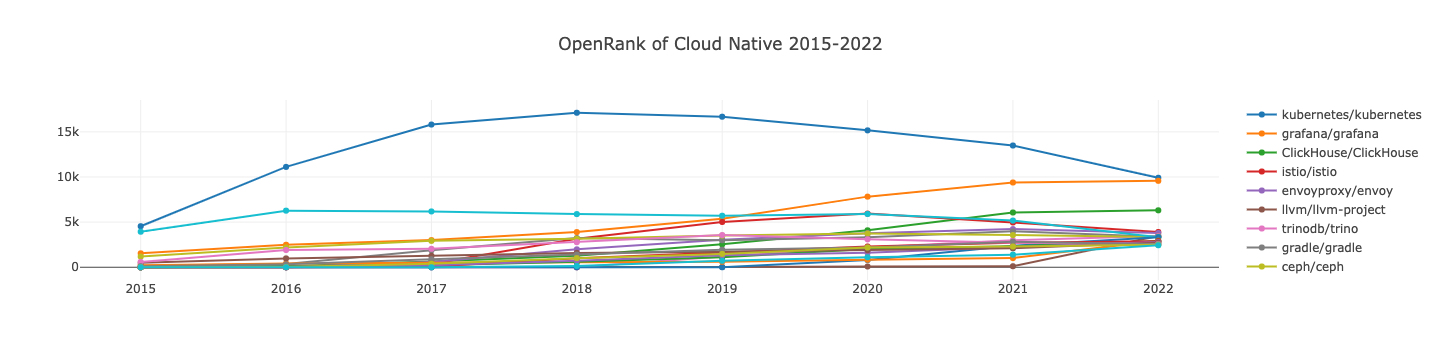

In [11]:
processTechFieldData(':technology/cloud_native', 'Cloud Native');

### 大数据

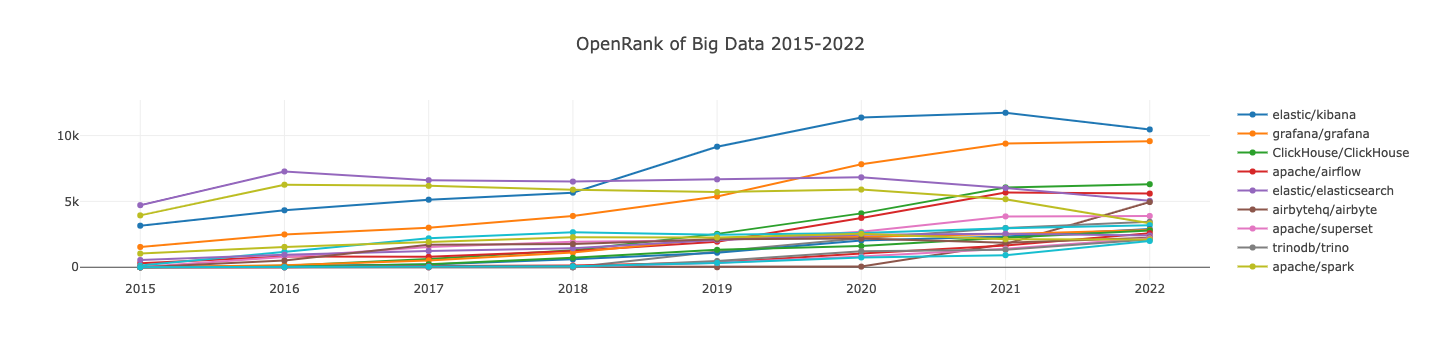

In [12]:
processTechFieldData(':technology/big_data', 'Big Data');

### 数据库

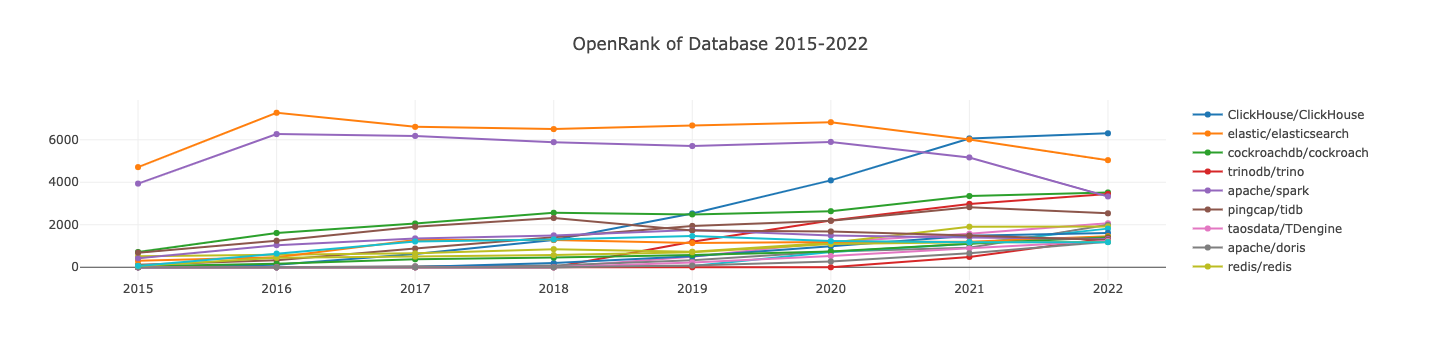

In [13]:
processTechFieldData(':technology/database', 'Database');

### 操作系统

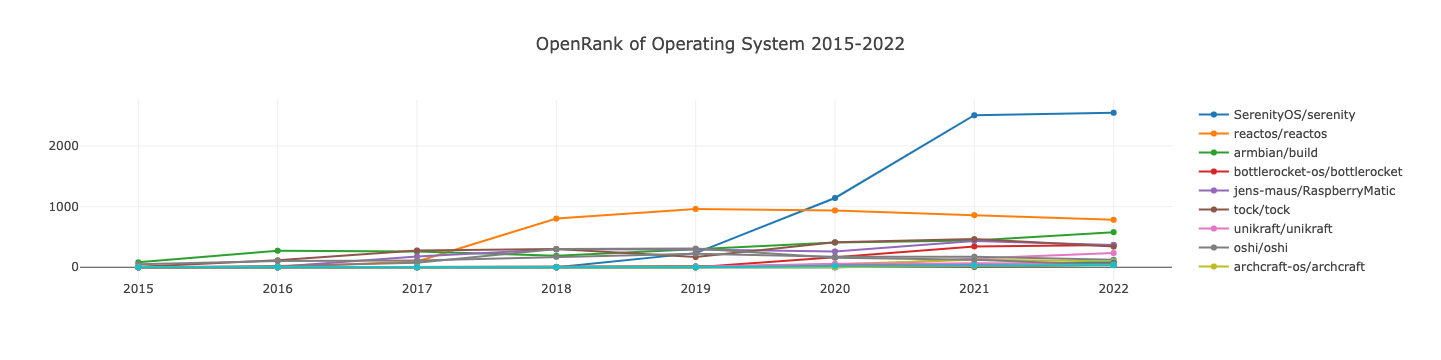

In [14]:
processTechFieldData(':technology/operating_system', 'Operating System');

## 应用领域项目 OpenRank Top 10 数据分析

此处给出数个应用领域 2022 年度 OpenRank 指标 Top 10 项目及其自 2015 年起的 OpenRank 变化趋势。*

### 依赖包和框架

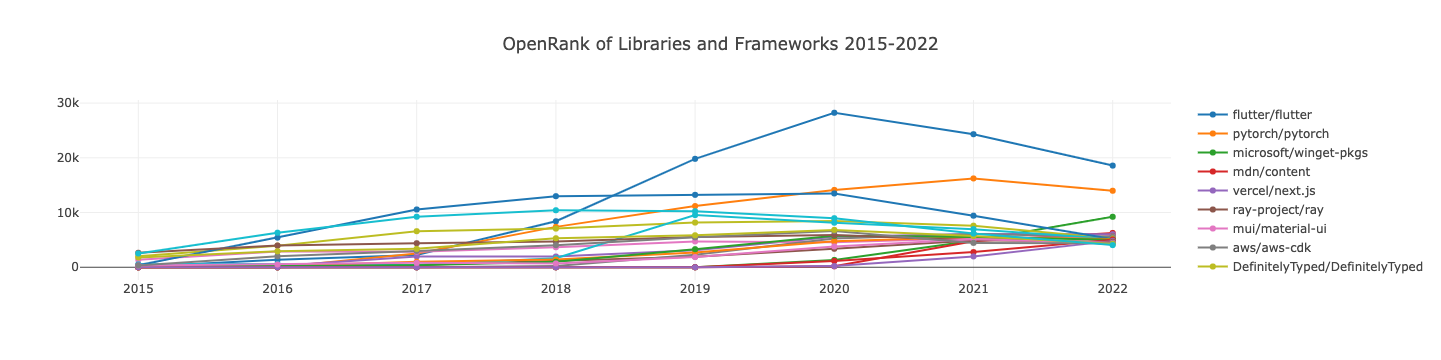

In [15]:
processTechFieldData(':application_domain/libraries_and_frameworks', 'Libraries and Frameworks');

### 应用软件

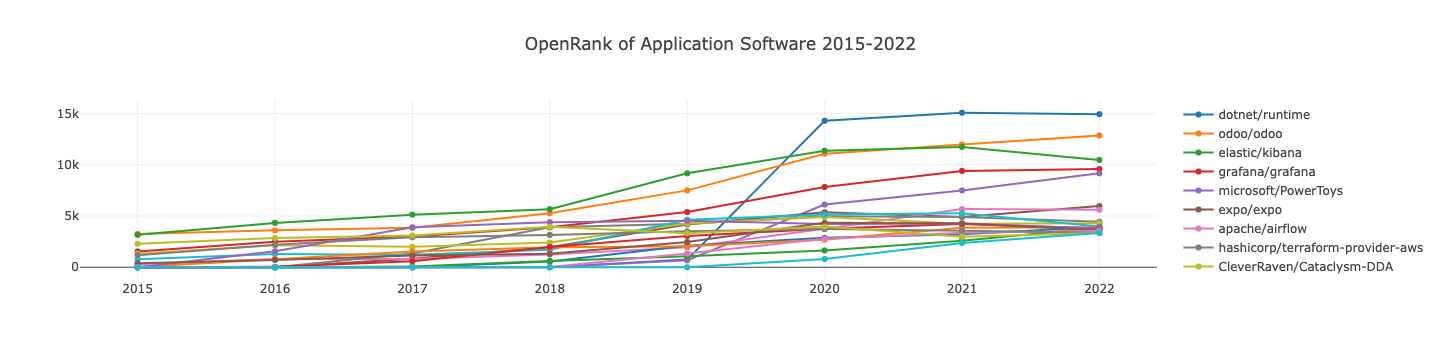

In [16]:
processTechFieldData(':application_domain/application_software', 'Application Software');

### 系统软件

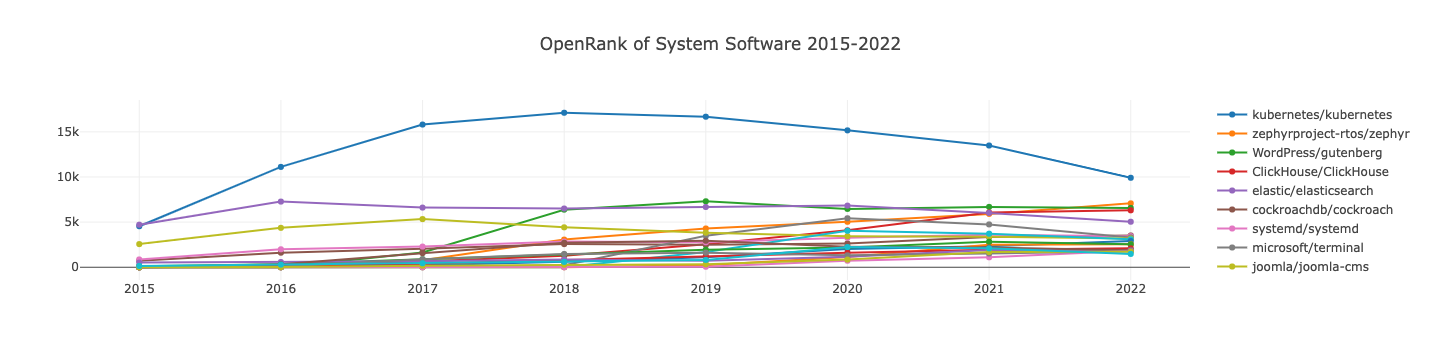

In [17]:
processTechFieldData(':application_domain/system_software', 'System Software');

### 软件工具

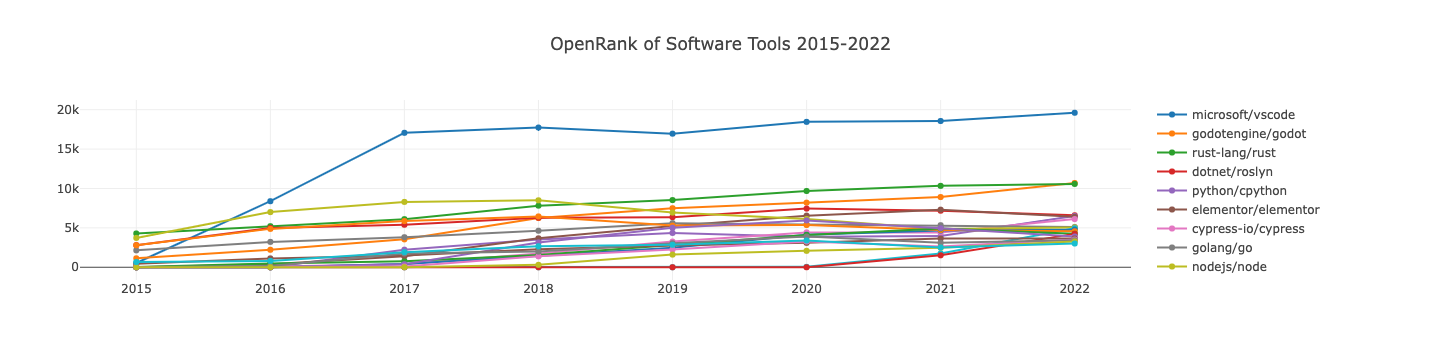

In [18]:
processTechFieldData(':application_domain/software_tools', 'Software Tools');

### 非软件

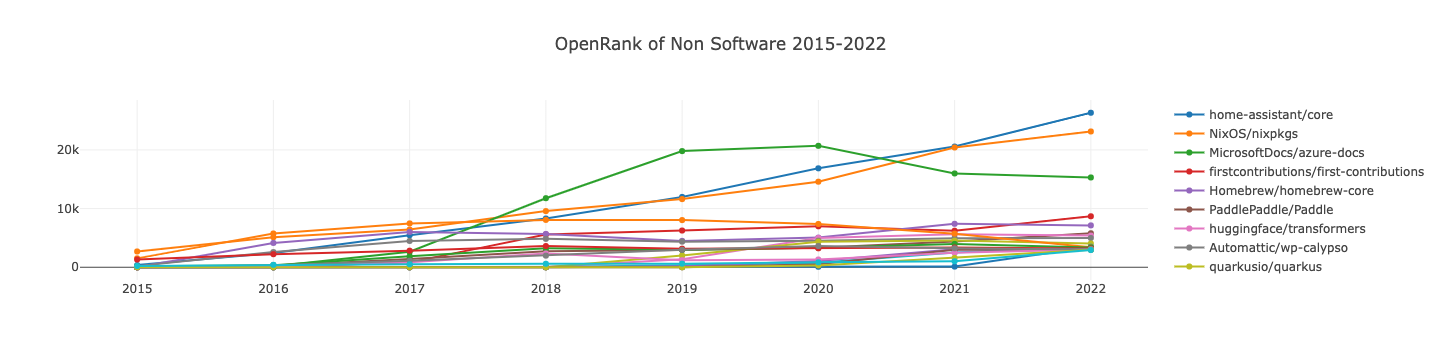

In [19]:
processTechFieldData(':application_domain/non_software', 'Non Software');

## 开源项目时区打点分布图

此处将根据中国项目 OpenRank Top 30 在 2022 全年中的事件按事件分布情况绘制打孔图，从而可以观察项目的工作时间分布情况。

In [20]:
openDigger.index.openrank.getRepoOpenrank({
    ...baseOptions, labelIntersect: [':regions/China'], limit: 30,
}).then(data => {
    var ids = data.map(r => r.id);
    var sql = `
SELECT repo_id, argMax(name, time) AS name, groupArray(count) AS data
FROM
(SELECT repo_id, argMax(repo_name, created_at) AS name, MAX(created_at) AS time, toDayOfWeek(created_at) AS weekday, toHour(created_at) AS hour, COUNT() AS count
FROM gh_events
WHERE toYear(created_at)=2022 AND repo_id IN (${ids.join(',')})
GROUP BY repo_id, weekday, hour
ORDER BY weekday, hour)
GROUP BY repo_id
    `;
    openDigger.driver.clickhouse.query(sql).then(data => {
        data.forEach(d => {
            const maxCount = Math.max(...d[2]);
            console.log(`项目 ${d[1]} 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distribution.svg?data=${JSON.stringify(d[2].map(c => Math.ceil(parseInt(c)*10/maxCount)))}`);
        });
    });
});

项目 NervJS/taro 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distribution.svg?data=[1,3,9,8,3,5,9,8,7,5,5,6,5,4,3,2,2,1,1,1,1,1,1,1,1,3,8,8,3,3,8,8,8,8,4,6,5,4,3,2,2,1,1,1,1,1,1,1,1,4,8,8,4,5,10,8,8,6,4,4,2,2,2,2,2,1,1,1,1,1,1,1,1,4,8,7,3,4,7,9,9,6,5,6,5,3,2,2,2,1,1,1,1,1,1,1,3,8,7,3,2,7,8,9,6,4,3,2,1,2,2,2,1,1,1,1,1,1,1,3,2,2,2,2,1,3,3,3,3,2,1,2,2,2,2,2,1,1,1,1,1,1,1,1,1,2,2,2,2,1,1,2,2,2,1,1,1,2,2,2,1,1,1,1,1,1]
项目 baidu/amis 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distribution.svg?data=[1,4,8,7,3,3,8,7,7,7,4,5,4,4,2,2,1,1,1,1,1,1,1,1,1,3,9,7,5,4,7,6,9,7,4,5,6,4,2,1,1,1,1,1,1,1,1,1,4,6,9,4,4,7,9,8,8,7,7,7,4,2,2,1,1,1,1,1,1,1,1,1,3,8,8,4,5,8,10,7,9,6,8,7,5,2,2,1,1,1,1,1,1,1,1,2,4,10,8,6,7,9,10,9,8,6,5,3,3,2,2,2,1,1,1,1,1,1,1,1,2,2,3,1,2,2,3,2,2,2,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,2,2,2,1,1,1,1,1,1,1,1]
项目 PaddlePaddle/PaddleDetection 的工作时间分布链接为：https://oss.x-lab.info/open_digger/assets/working_hour_distribution.svg?data=[

> * 项目与开发者标签请参考 OpenDigger 项目标签数据，有额外标签数据欢迎 Issue 提交